In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set display options for clarity
pd.set_option('display.max_columns', None)

# Load UFO data
df = pd.read_csv('/content/drive/MyDrive/UFO/nuforc_india.csv', encoding='ISO-8859-1')
df.head()


,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation
0,Open,04-09-2025 18:01,Howrah,West Bengal,India,Circle,Seen from the window of a flat on the fourth f...,04-09-2025,NaN,NaN
1,Open,04-05-2025 22:15,Dindigul,Tamil Nadu,India,Circle,Strange Circle of Lights in Night Sky,04-05-2025,Y,Searchlight
2,Open,03/18/2025 20:06,Haridwar,Uttarakhand,India,Triangle,"Saw a silent, transparent/black triangular cra...",03/18/2025,NaN,NaN
3,Open,03/18/2025 05:00,Ranchi,Jharkhand,India,Disk,I was waiting for my father when i saw a disk ...,03/18/2025,NaN,NaN
4,Open,03-11-2025 19:17,Gurugram,Haryana,India,Circle,Glowing Orb,03-11-2025,Y,ISS


In [ ]:
# Convert Occurred column to datetime
df['datetime'] = pd.to_datetime(df['Occurred'], errors='coerce')

# Drop rows with invalid or missing datetime
df = df.dropna(subset=['datetime'])

# Extract temporal features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

<ipython-input-4-0215b8be4610>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['datetime'].dt.year
<ipython-input-4-0215b8be4610>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['datetime'].dt.month
<ipython-input-4-0215b8be4610>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

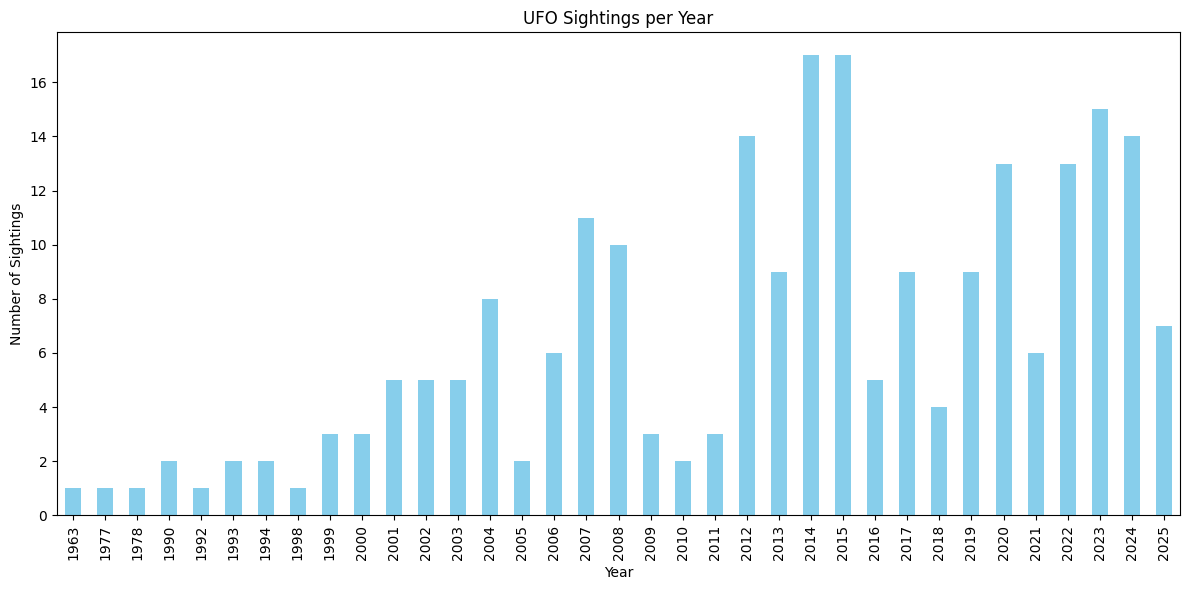

In [ ]:
# Plot: Number of UFO sightings per year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

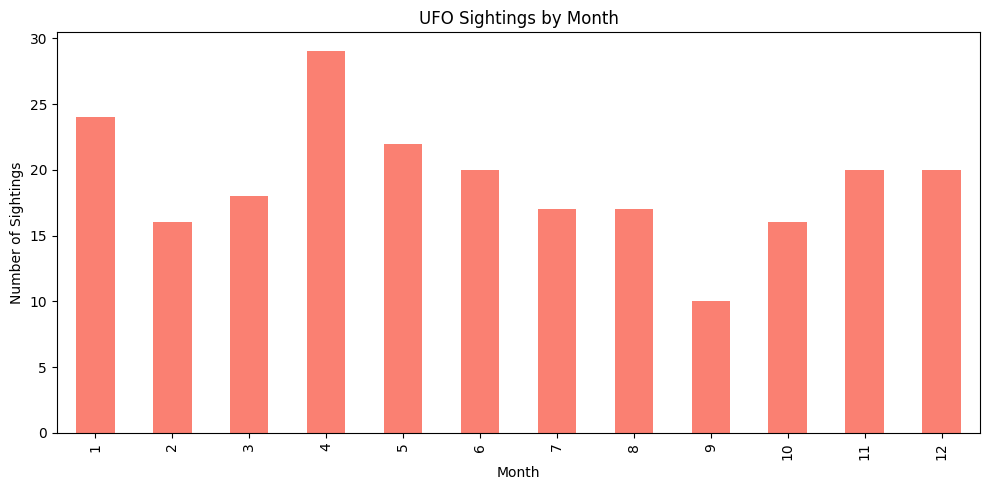

In [ ]:
# Plot: Number of sightings per month
plt.figure(figsize=(10, 5))
df['month'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

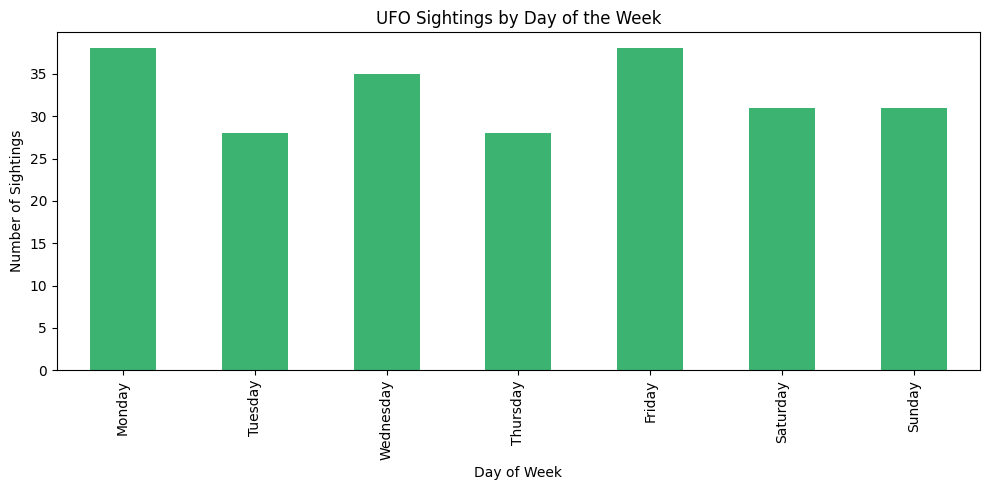

In [ ]:
# Plot: Number of sightings by day of week
plt.figure(figsize=(10, 5))
df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='mediumseagreen')
plt.title('UFO Sightings by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

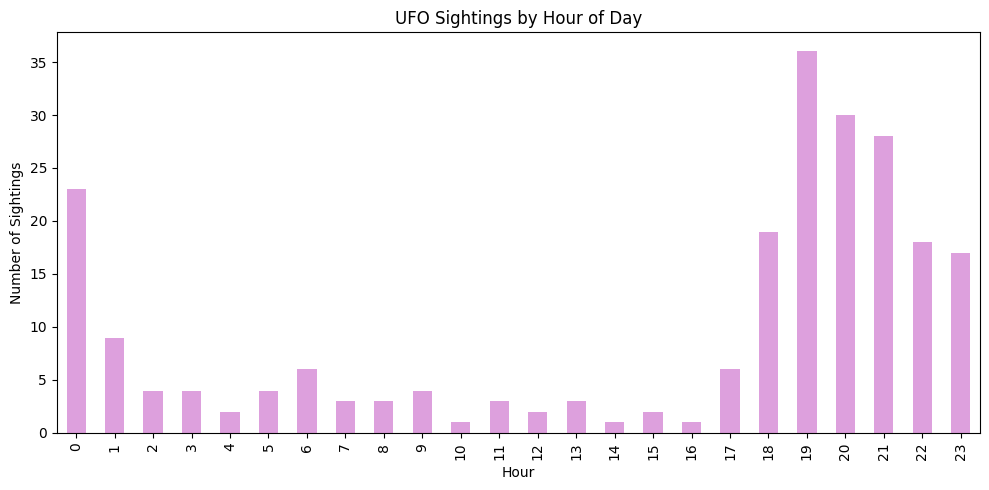

In [ ]:
# Plot: Sightings by hour of day
plt.figure(figsize=(10, 5))
df['hour'].value_counts().sort_index().plot(kind='bar', color='plum')
plt.title('UFO Sightings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

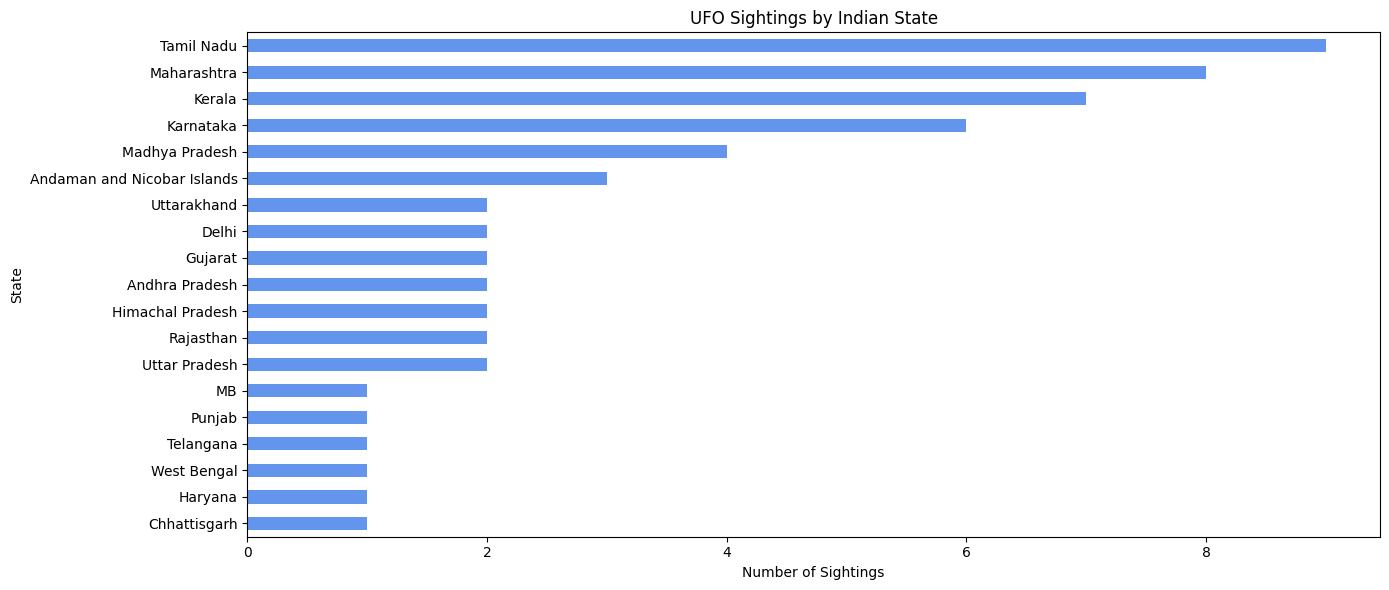

In [ ]:
# Clean location data for state-wise heatmap
# Only keep US states
# df_us = df[df['country'] == 'us']

# Drop NA states
df = df.dropna(subset=['State'])

# Uppercase state codes
# df_us['state'] = df_us['state'].str.upper()

# Plot: Sightings by US state
plt.figure(figsize=(14, 6))
df['State'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('UFO Sightings by Indian State')
plt.xlabel('Number of Sightings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Advanced Spatiotemporal Analysis

## 1. Time Series Decomposition (Seasonal + Trend + Residual)
Goal: Separate long-term trends, seasonal patterns (e.g., summer spikes), and noise.

In [ ]:
# Ensure datetime is actually in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop any rows where datetime is still invalid
df = df.dropna(subset=['datetime'])


<ipython-input-12-9efd2ab15ed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')


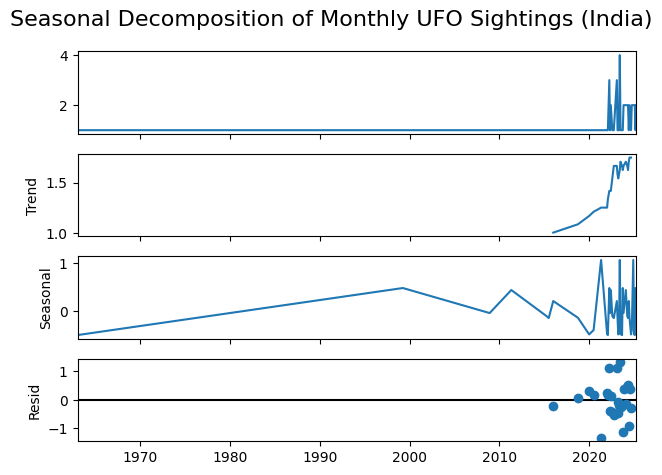

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Recreate a datetime index from 'year' and 'month'
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')

# Count sightings per month
sightings_ts = df.groupby('year_month').size()

# Seasonal decomposition (monthly = period 12)
result = seasonal_decompose(sightings_ts, model='additive', period=12)

# Plot
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly UFO Sightings (India)', fontsize=16)
plt.tight_layout()
plt.show()


##  2. Spatiotemporal Heatmaps (Sightings by Year × State)
Goal: See how sightings vary across time for each region.

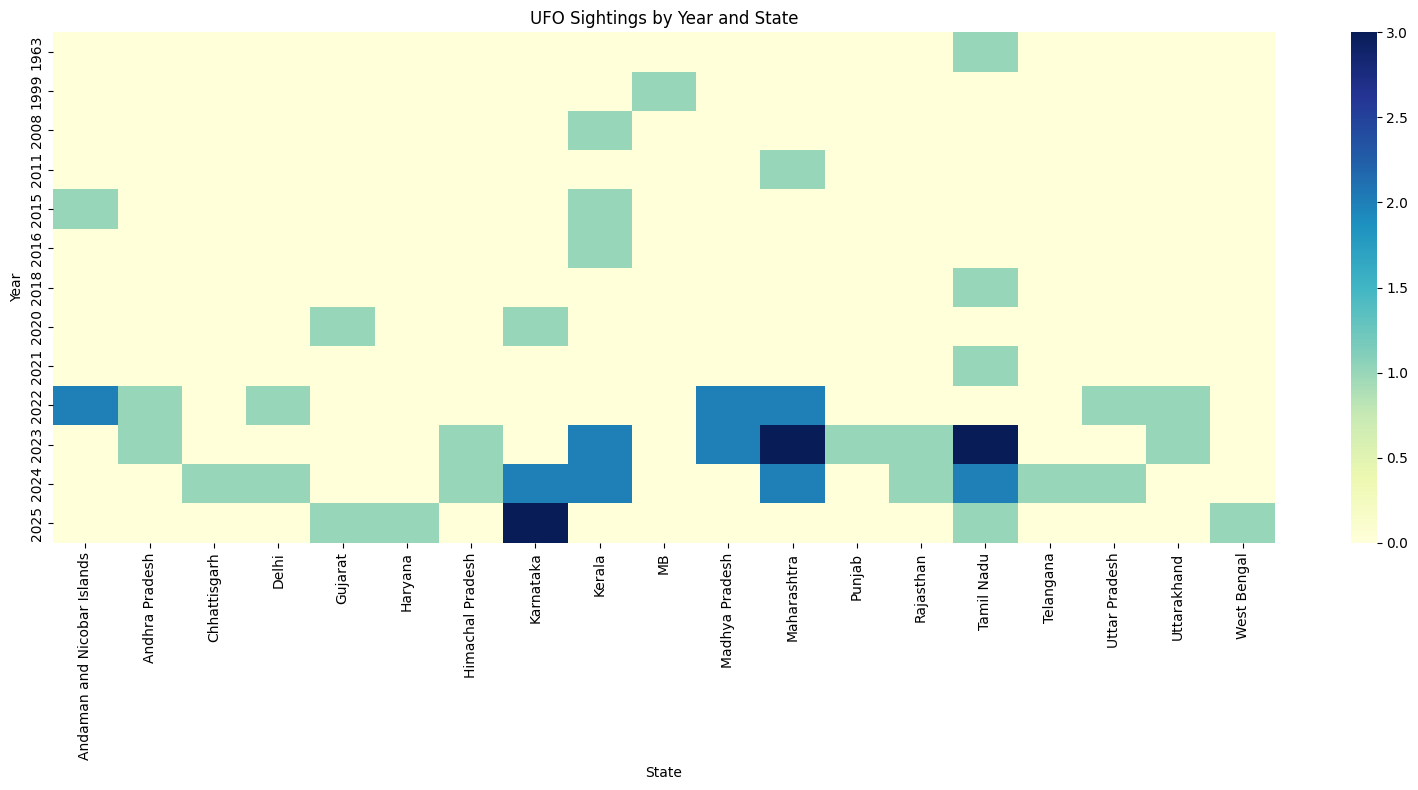

In [ ]:
import seaborn as sns

heatmap_data = df.groupby(['year', 'State']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("UFO Sightings by Year and State")
plt.xlabel("State")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


##  3. Growth Rate Analysis (Where sightings are accelerating)

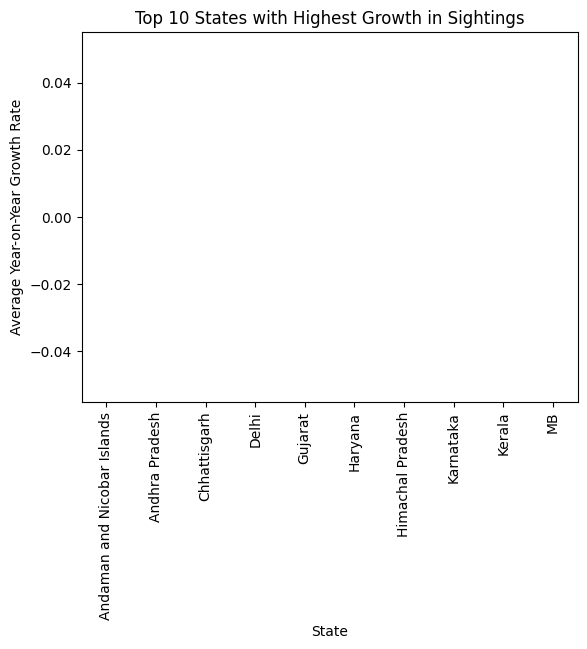

In [ ]:
state_year = df.groupby(['year', 'State']).size().reset_index(name='sightings')
pivot = state_year.pivot(index='year', columns='State', values='sightings').fillna(0)
growth_rate = pivot.pct_change().mean().sort_values(ascending=False)

growth_rate.head(10).plot(kind='bar', title="Top 10 States with Highest Growth in Sightings")
plt.ylabel("Average Year-on-Year Growth Rate")
plt.show()


## 4. Anomaly Detection in Temporal Sightings
Use z-scores or moving averages to identify years or months with unexpected spikes.

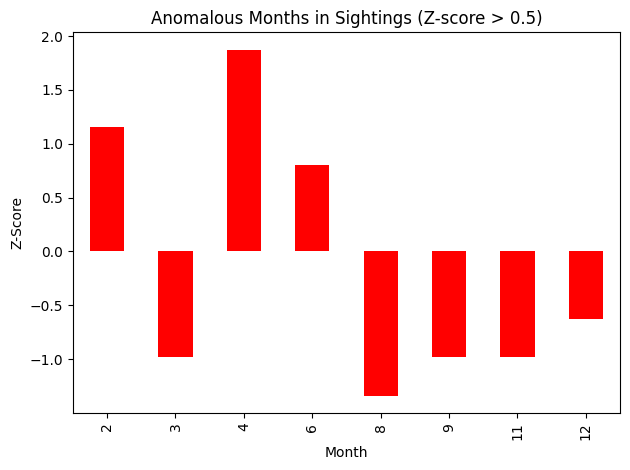

In [ ]:
# Count sightings per month (1 to 12)
monthly_counts = df['month'].value_counts().sort_index()

# Compute Z-scores
z_scores = (monthly_counts - monthly_counts.mean()) / monthly_counts.std()

# Identify anomalies where Z-score > 2
anomalies = z_scores[abs(z_scores) > 0.5]

# Plot anomalies
anomalies.plot(kind='bar', color='red', title='Anomalous Months in Sightings (Z-score > 0.5)')
plt.xlabel("Month")
plt.ylabel("Z-Score")
plt.tight_layout()
plt.show()
